### GRADIENT DESCENT

+ Gradient Descent is taling the Dervatives, or finding the Slope to go to the minimum.

+ Gradient Descent is an Optimization Algorithm.

+ The idea of GD is to tweak the paramters iteratively in order to get the minimized cost function.


`Process :- Randomly initiaize the 0, then improve it gradually taking small steps at a time attempting to decrease the cost function until the algorithms converges to minimum.`

`Size of the Step is determined by Hyperparameter called, Learning Rate.`

`If the learning rate is too small, the model will take too much steps tp converge, so it will take long time.`

`If the learning rate is high, it may not find the good solution.`

Two Main Challenges of GD.

    1. If the random initialiation starts on the left, then it will converge to a local minimum, which is not good as global minimum.

    2. If its starts on the right, then it will taem very long time to converge.

**THREE TYPES OF GRADIENT DESCENT ALGORITHMS**

    1. Batch Gradient Descent.

    2. Stochastic Gradient Descent.

    3. Mini Batch Gradient Descent.



**NORMAL METHOD**

Below code is the prediction using Normal Method.

In [23]:
import pandas as pd
import numpy as np
import random
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict
print(theta_best)

[[4.17795097]
 [2.87092976]]


**BATCH GRADIENT DESCENT**

+ Batch GD method.
+ In this method, it will use the whole training set to compute the gradient descent.
+ Which maes it very slow when the training set is large.

Implementation of Batch GD Below.

In [7]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [8]:
theta

array([[4.08493075],
       [2.7159155 ]])

In [9]:
X_new_b.dot(theta)

array([[4.08493075],
       [9.51676176]])

In [10]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

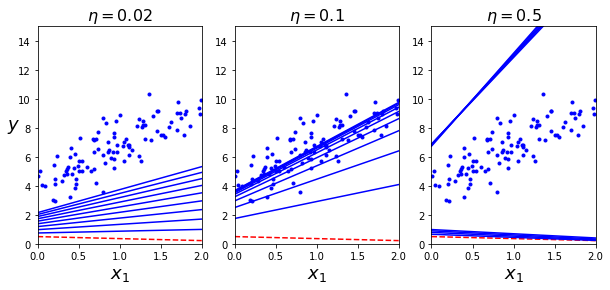

In [11]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

+ When the Learning Rate is Low, the algorithm will take more time to Converge.

+ In the middle, when the learning rate is normal, the algorithm find the minimum.

+ When the Learning rate is too high, the algorithm may not be able to find the minimum.



**STOCHASTIC GRADIENT DESCENT**

+ In this method, the algorithm will pick a random instance in the training set.

+ and compute the gradient descent based only on that single instance.

+ The algorithm will be much faster.

+ this algorithm is much less regular than Batch GD

+ Instead of gently decreasing the 0 values, the cost function will go up and down.

+ by time it will comes around the minimum where it will bounce around.

+ So, once the algorithm stops, the soluiton will be good, but not optimum.

+ When the Cost function is very Irregular, it can actually helps the algorithm jumps out of local minimum.

+ So Stochastic GD has a better chance of finding the Global Minimum.

+ But it will not settle in the Minimum even if it find the minimum.

+ this can be rectified by reducing the learing rate gradually, not too quick and not too slow.

+ and eventually the Cost function will converge to Minimum.

In [12]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

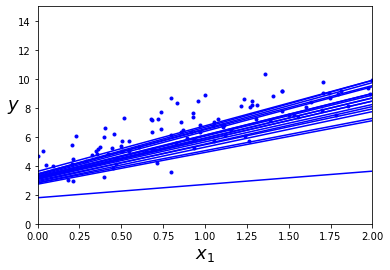

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)  ## learning schedule function

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                   
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X, y, "b.")                            
plt.xlabel("$x_1$", fontsize=18)                 
plt.ylabel("$y$", rotation=0, fontsize=18)          
plt.axis([0, 2, 0, 15])                              
plt.show()   

In [17]:
theta

array([[4.06073391],
       [2.71977194]])

Scikit-Learn Provides SGDRegressor class to use Stochastic GD

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.07780223]), array([2.71882278]))

**MINI BATCH GRADIENT DESCENT**

+ Mini-Batch GD computes the gradients on small random sets of instances called mini-batches.

In [19]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [20]:
theta

array([[4.15579866],
       [2.77666826]])

In [21]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

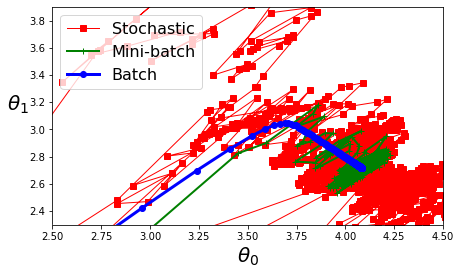

In [22]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Outputs:--

+ Normal Equation : `[4.17795097][2.87092976]`

+ Batch GD : `[4.08493075],[2.7159155 ]`

+ Stochastic GD : `[4.06073391],[2.71977194]`

+ Mini Batch GD : `[4.15579866],[2.77666826]`

Almost get the same Values as the Parameters, 01 and 